In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("../data/glass.csv").drop("Id", axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [51]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
base_models = {
    "Decision Tree (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Decision Tree (max_depth=3)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Decision Tree (max_depth=1)": DecisionTreeClassifier(max_depth=1, random_state=42),
    "SVM": SVC(kernel="rbf", C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(random_state=42),
}

In [30]:
import numpy as np

In [31]:
n_estimators_range = np.arange(1, 51, 5)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, test_df = train_test_split(
    df, random_state=42, shuffle=True, test_size=0.25, stratify=df["Type"]
)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(train_df.drop("Type", axis=1))
X_test_scaled = sc.transform(test_df.drop("Type", axis=1))

In [36]:
y_train, y_test = train_df["Type"], test_df["Type"]

In [38]:
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

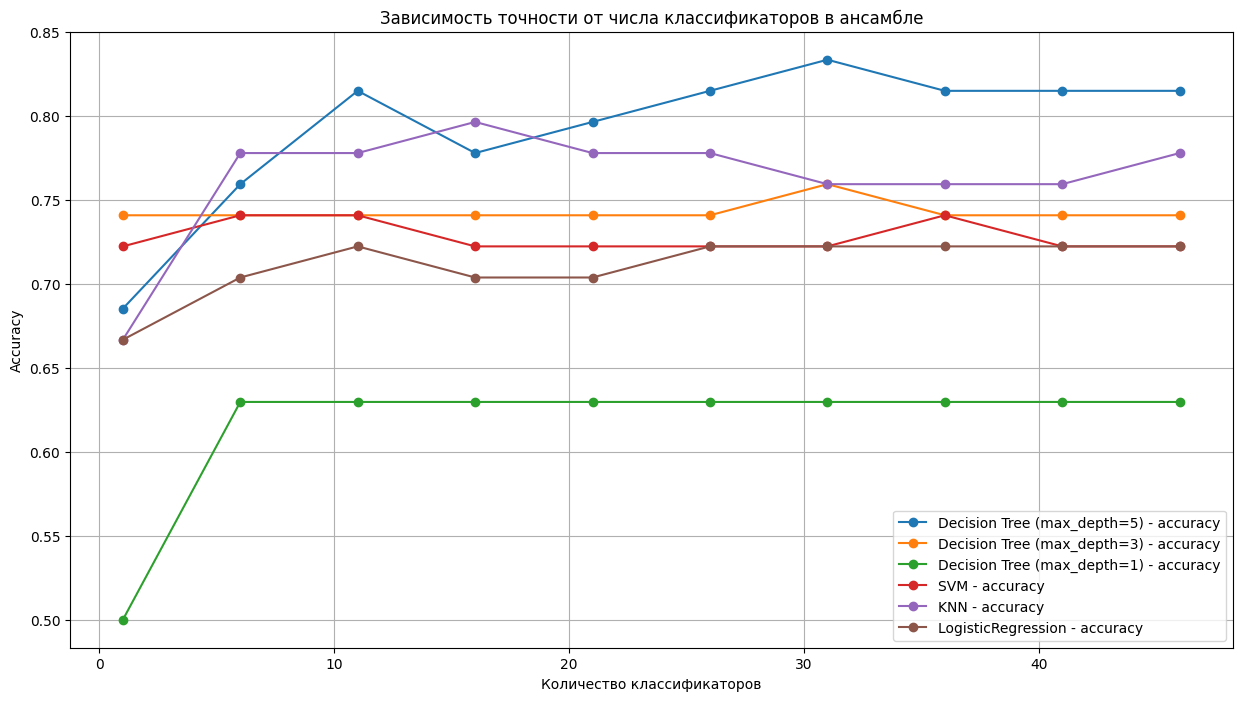

CPU times: user 1min 23s, sys: 64.7 ms, total: 1min 23s
Wall time: 15.3 s


In [49]:
%%time

plt.figure(figsize=(15, 8))

for model_name, model in base_models.items():
    accuracies, f1_scores = [], []

    for n in n_estimators_range:
        bagging = BaggingClassifier(estimator=model, n_estimators=n, random_state=42)
        bagging.fit(X_train_scaled, y_train)
        y_pred = bagging.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average="macro"))

    plt.plot(
        n_estimators_range, accuracies, marker="o", label=f"{model_name} - accuracy"
    )
    # plt.plot(n_estimators_range, f1_scores, marker='o', label=f"{model_name} - f1-macro")

plt.title("Зависимость точности от числа классификаторов в ансамбле")
plt.xlabel("Количество классификаторов")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show();